In [110]:
# data analysis and wrangling
import pandas as pd
import numpy as np

# data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('seaborn')
sns.set(font_scale=2.5)

# find NULL Data
import missingno as msno

# ignore warnings
import warnings
warnings.filterwarnings('ignore')


from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats

In [111]:
# dataset
df_train = pd.read_csv('./train.csv')
df_test = pd.read_csv('./test.csv')
ids = df_test['Id'].values

In [112]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [113]:
# NaN data
for col in df_train.columns:
    msg = 'columns: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (df_train[col].isnull().sum() / df_train[col].shape[0]))
    print(msg)
print("_"*50 + "\n")
for col in df_test.columns:
    msg = 'columns: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (df_test[col].isnull().sum() / df_test[col].shape[0]))
    print(msg)

columns:         Id	 Percent of NaN value: 0.00%
columns: MSSubClass	 Percent of NaN value: 0.00%
columns:   MSZoning	 Percent of NaN value: 0.00%
columns: LotFrontage	 Percent of NaN value: 17.74%
columns:    LotArea	 Percent of NaN value: 0.00%
columns:     Street	 Percent of NaN value: 0.00%
columns:      Alley	 Percent of NaN value: 93.77%
columns:   LotShape	 Percent of NaN value: 0.00%
columns: LandContour	 Percent of NaN value: 0.00%
columns:  Utilities	 Percent of NaN value: 0.00%
columns:  LotConfig	 Percent of NaN value: 0.00%
columns:  LandSlope	 Percent of NaN value: 0.00%
columns: Neighborhood	 Percent of NaN value: 0.00%
columns: Condition1	 Percent of NaN value: 0.00%
columns: Condition2	 Percent of NaN value: 0.00%
columns:   BldgType	 Percent of NaN value: 0.00%
columns: HouseStyle	 Percent of NaN value: 0.00%
columns: OverallQual	 Percent of NaN value: 0.00%
columns: OverallCond	 Percent of NaN value: 0.00%
columns:  YearBuilt	 Percent of NaN value: 0.00%
columns: Yea

<AxesSubplot:>

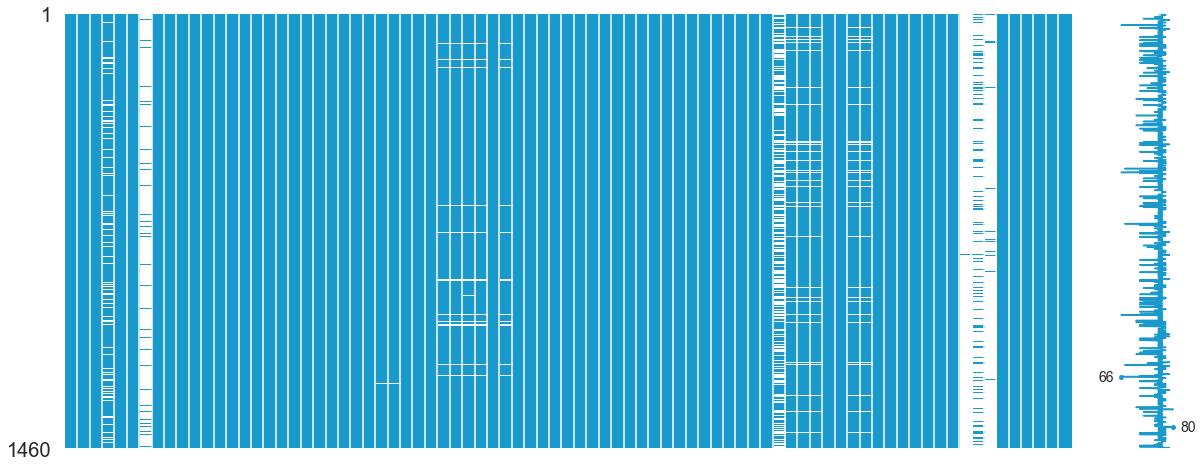

In [114]:
msno.matrix(df=df_train.iloc[:, :], figsize=(20, 8), color=(0.1, 0.6, 0.8))

<AxesSubplot:>

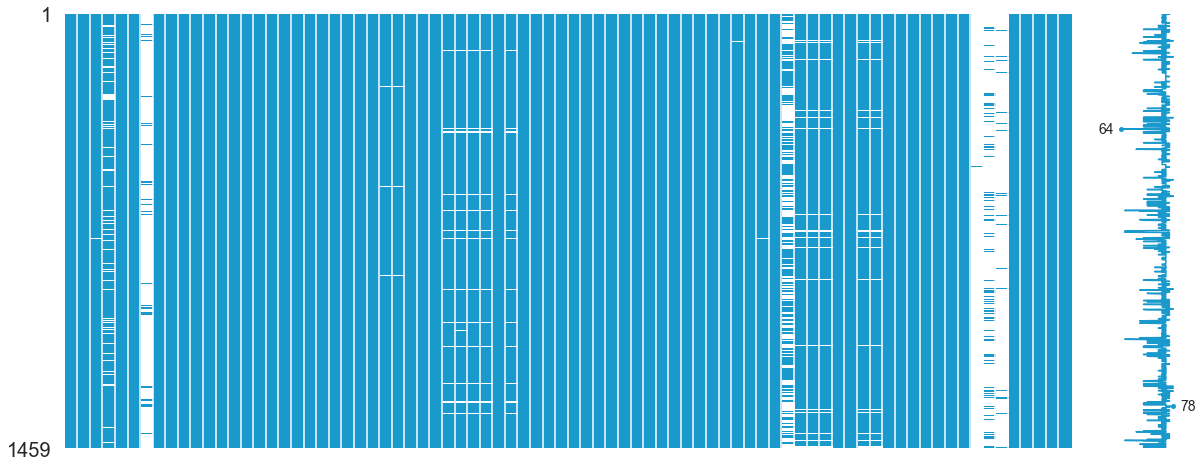

In [115]:
msno.matrix(df=df_test.iloc[:, :], figsize=(20, 8), color=(0.1, 0.6, 0.8))

In [116]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [117]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

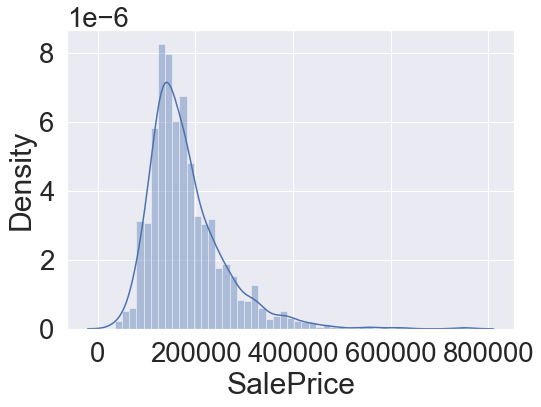

In [118]:
sns.distplot(df_train['SalePrice'])

In [119]:
x_train = df_train.drop('SalePrice', 1)
y_train = df_train.SalePrice.values

In [120]:
df_train.drop("Id", axis = 1, inplace = True)
df_test.drop("Id", axis = 1, inplace = True)

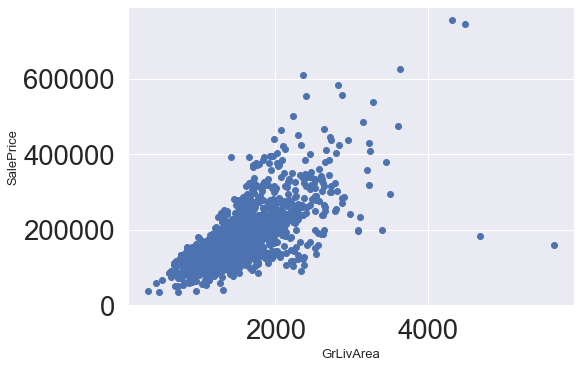

In [121]:
fig, ax = plt.subplots()
ax.scatter(x = df_train['GrLivArea'], y = df_train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

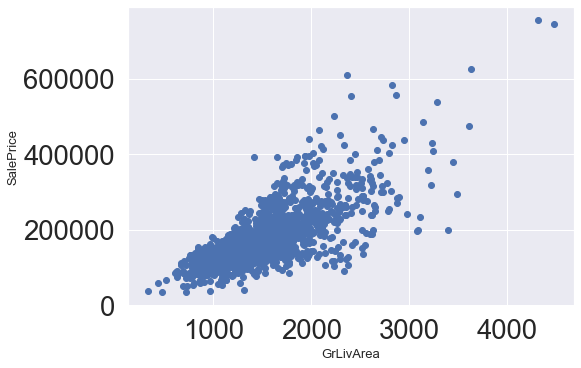

In [122]:
df_train = df_train.drop(df_train[(df_train['GrLivArea']>4000) & (df_train['SalePrice']<300000)].index)

#Check the graphic again
fig, ax = plt.subplots()
ax.scatter(df_train['GrLivArea'], df_train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

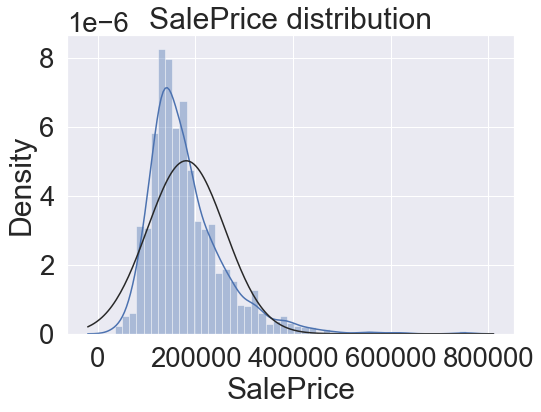

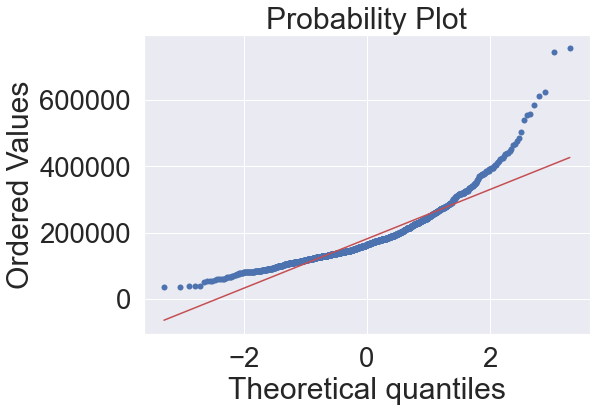

In [123]:
res = sns.distplot(df_train['SalePrice'] , fit=norm)
res.set_title("SalePrice distribution")

# qq plot
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)
plt.show()

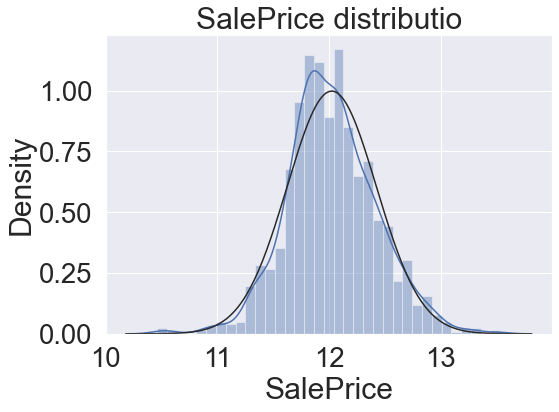

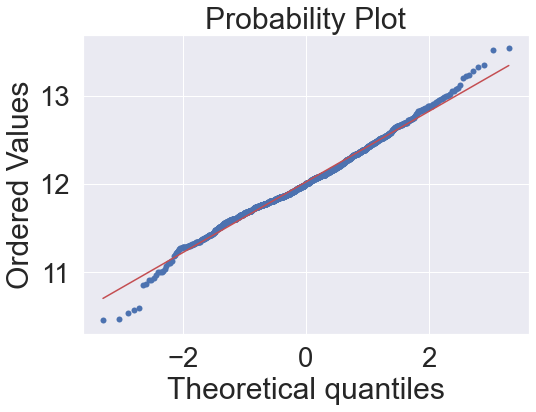

In [124]:
df_train["SalePrice"] = np.log1p(df_train["SalePrice"]) #로그 변환
res = sns.distplot(df_train['SalePrice'] , fit=norm)
res.set_title("SalePrice distributio")

# qq plot
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)
plt.show()

## Feature Engineering

In [125]:
ntrain = df_train.shape[0]
ntest = df_test.shape[0]
y_train = df_train.SalePrice.values
all_data = pd.concat((df_train, df_test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)
print("all_data size is : {}".format(all_data.shape))

all_data size is : (2917, 79)


In [126]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(20)

,Missing Ratio
PoolQC,99.691464
MiscFeature,96.400411
Alley,93.212204
Fence,80.425094
FireplaceQu,48.680151
LotFrontage,16.660953
GarageFinish,5.450806
GarageQual,5.450806
GarageCond,5.450806
GarageYrBlt,5.450806


Text(0, 0.5, 'Percent of missing data by feature')

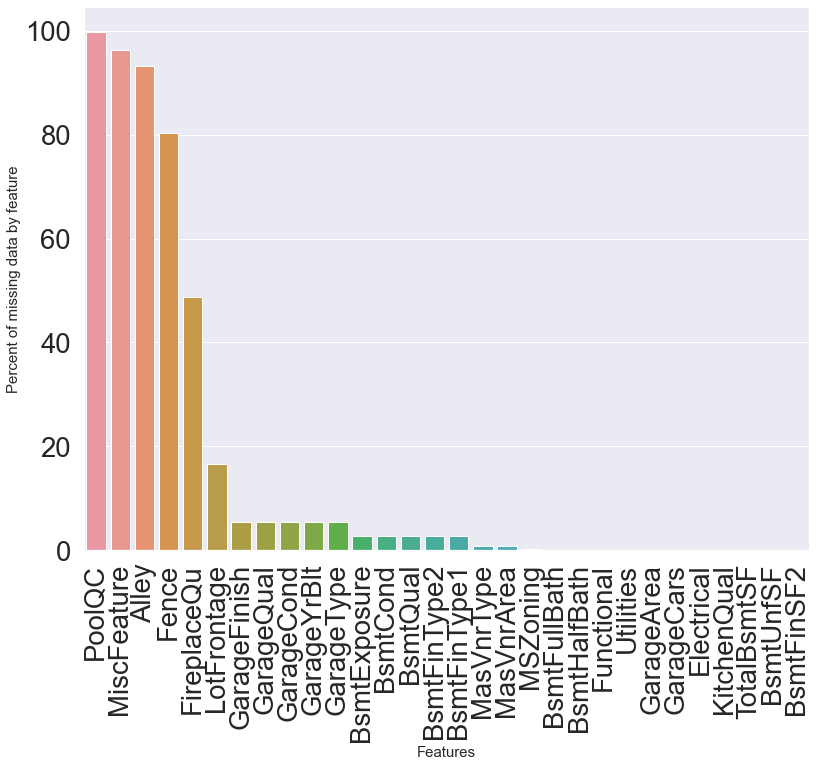

In [127]:
f, ax = plt.subplots(figsize=(13, 10))
plt.xticks(rotation='90')
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.ylabel('Percent of missing data by feature', fontsize=15)

In [143]:
# dataset
df_train = pd.read_csv('./train.csv')
df_test = pd.read_csv('./test.csv')
ids = df_test['Id'].values

In [144]:
int_data = []
for i in df_train.columns:
    if type(df_train[i][0]) == type(df_train['SalePrice'][0]):
        int_data.append(i)
        
heatmap_data = df_train[int_data]

In [145]:
heatmap_d1 = heatmap_data.iloc[:, :len(int_data)//2]
heatmap_d1['SalePrice'] = df_train['SalePrice']
heatmap_d2 = heatmap_data.iloc[:, len(int_data)//2:]

<AxesSubplot:title={'center':'Pearson Correalation of Features'}>

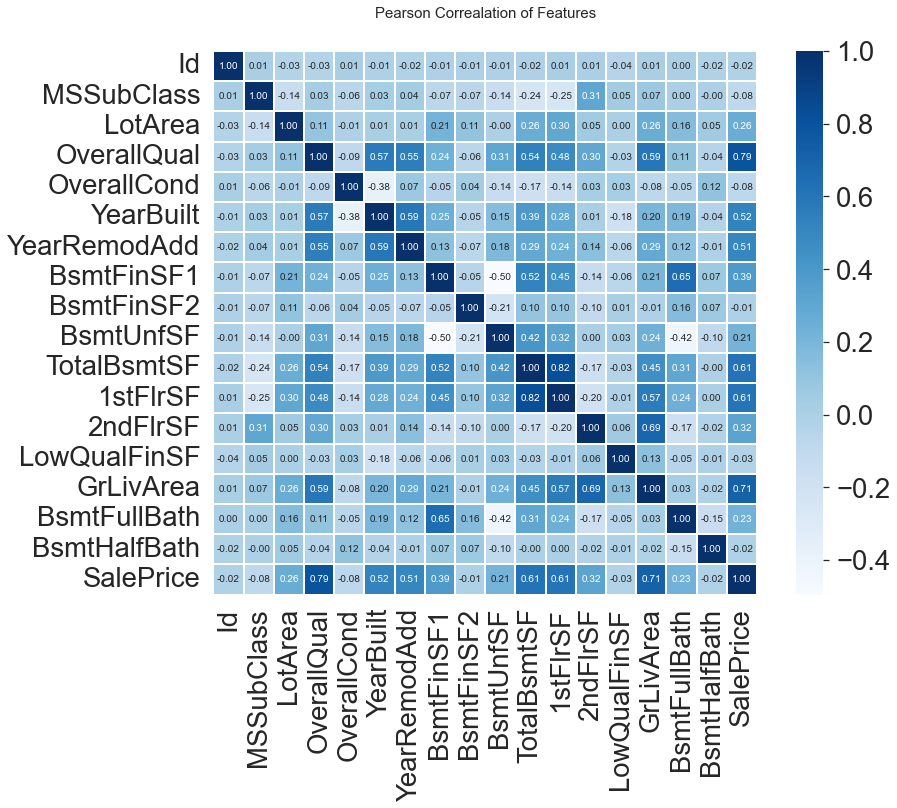

In [146]:
colormap = plt.cm.Blues
plt.figure(figsize=(14, 10))
plt.title('Pearson Correalation of Features', y=1.05, size=15)
sns.heatmap(heatmap_d1.astype(float).corr(), linewidths=0.1, vmax=1.0,
           square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={'size':10}, fmt='.2f')

<AxesSubplot:title={'center':'Pearson Correalation of Features'}>

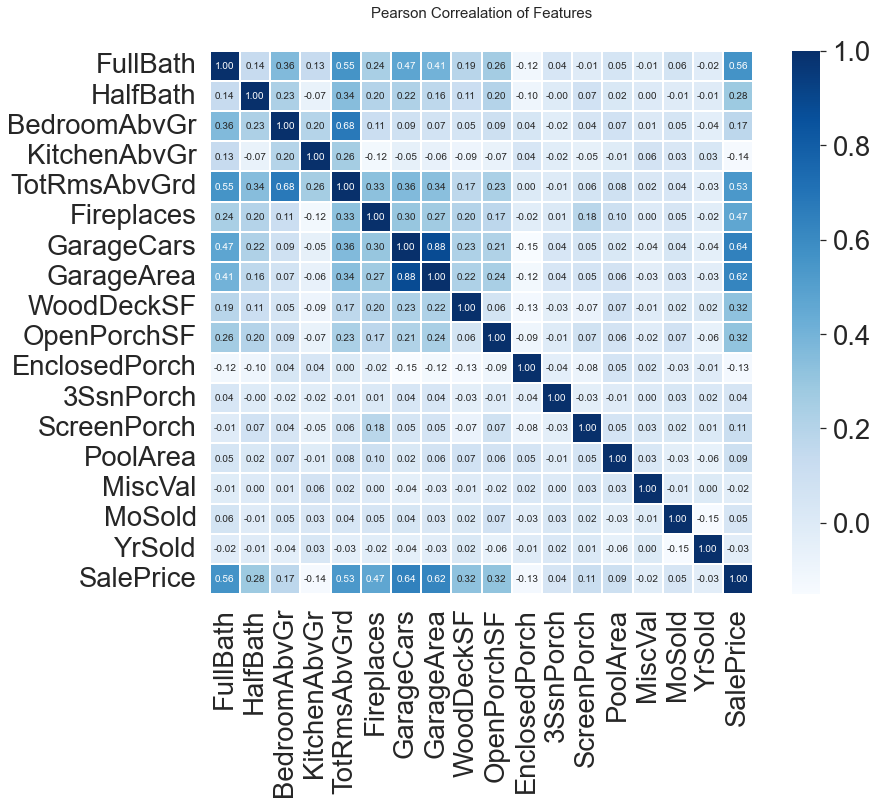

In [147]:
colormap = plt.cm.Blues
plt.figure(figsize=(14, 10))
plt.title('Pearson Correalation of Features', y=1.05, size=15)
sns.heatmap(heatmap_d2.astype(float).corr(), linewidths=0.1, vmax=1.0,
           square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={'size':10}, fmt='.2f')

## Inputing missing values

In [149]:
all_data['PoolQC'].fillna("None", inplace=True)
all_data['PoolQC'].isnull().sum()

0

In [150]:
all_data['MiscFeature'].fillna("None", inplace=True)
all_data['MiscFeature'].isnull().sum()

0

In [151]:
all_data['Alley'].fillna("None", inplace=True)
all_data['Alley'].isnull().sum()

0

In [152]:
all_data['Fence'].fillna("None", inplace=True)
all_data['Fence'].isnull().sum()

0

In [153]:
all_data['FireplaceQu'].fillna("None", inplace=True)
all_data['FireplaceQu'].isnull().sum()

0

In [154]:
all_data['LotFrontage'] = all_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))
all_data['LotFrontage'].isnull().sum()

0

In [160]:
cols = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']
all_data[cols].fillna('None', inplace=True)
all_data[cols].isnull().sum()

GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
dtype: int64

In [156]:
cols = ['GarageYrBlt', 'GarageArea', 'GarageCars']
all_data[cols].fillna(0, inplace=True)
all_data[cols].isnull().sum()

GarageYrBlt    0
GarageArea     0
GarageCars     0
dtype: int64

In [158]:
cols = ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath']
all_data[cols].fillna(0, inplace=True)
all_data[cols].isnull().sum()

BsmtFinSF1      0
BsmtFinSF2      0
BsmtUnfSF       0
TotalBsmtSF     0
BsmtFullBath    0
BsmtHalfBath    0
dtype: int64

In [159]:
cols = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']
all_data[cols].fillna('None', inplace=True)
all_data[cols].isnull().sum()

BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
dtype: int64

In [164]:
all_data["MasVnrType"].fillna("None", inplace=True)
all_data["MasVnrArea"].fillna(0, inplace=True)
all_data[["MasVnrType", "MasVnrArea"]].isnull().sum()

MasVnrType    0
MasVnrArea    0
dtype: int64

In [168]:
all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0], inplace=True)
all_data["MSZoning"].isnull().sum()

0

In [169]:
all_data.drop(['Utilities'], axis=1, inplace=True)

In [170]:
all_data["Functional"].fillna("Typ", inplace=True)
all_data["Functional"].isnull().sum()

0

In [177]:
all_data['Electrical'].fillna(all_data['Electrical'].mode()[0], inplace=True)
all_data['Electrical'].isnull().sum()

0

In [10]:
# train_columns = []
# for i in df_train_o.columns:
#     if df_train_o['SalePrice'].corr(df_train_o[i], method='kendall') >= 0.3:
#         train_columns.append(i)
# test_columns = train_columns[:len(train_columns)-1]

In [11]:
# df_train = df_train_o[train_columns]
# df_test = df_test_o[test_columns]

In [12]:
df_train.head()

,LotArea,Alley,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,Foundation,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,OpenPorchSF,SalePrice
0,8450,NaN,7,2003,2003,196.0,PConc,856,856,1710,2,8,0,2003.0,2,548,61,208500
1,9600,NaN,6,1976,1976,0.0,CBlock,1262,1262,1262,2,6,1,1976.0,2,460,0,181500
2,11250,NaN,7,2001,2002,162.0,PConc,920,920,1786,2,6,1,2001.0,2,608,42,223500
3,9550,NaN,7,1915,1970,0.0,BrkTil,756,961,1717,1,7,1,1998.0,3,642,35,140000
4,14260,NaN,8,2000,2000,350.0,PConc,1145,1145,2198,2,9,1,2000.0,3,836,84,250000


In [13]:
df_test.head()

,LotArea,Alley,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,Foundation,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,OpenPorchSF
0,11622,NaN,5,1961,1961,0.0,CBlock,882.0,896,896,1,5,0,1961.0,1.0,730.0,0
1,14267,NaN,6,1958,1958,108.0,CBlock,1329.0,1329,1329,1,6,0,1958.0,1.0,312.0,36
2,13830,NaN,5,1997,1998,0.0,PConc,928.0,928,1629,2,6,1,1997.0,2.0,482.0,34
3,9978,NaN,6,1998,1998,20.0,PConc,926.0,926,1604,2,7,1,1998.0,2.0,470.0,36
4,5005,NaN,8,1992,1992,0.0,PConc,1280.0,1280,1280,2,5,0,1992.0,2.0,506.0,82


In [14]:
df_train.isnull().sum()

LotArea            0
Alley           1369
OverallQual        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
Foundation         0
TotalBsmtSF        0
1stFlrSF           0
GrLivArea          0
FullBath           0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
OpenPorchSF        0
SalePrice          0
dtype: int64

In [15]:
df_test.isnull().sum()

LotArea            0
Alley           1352
OverallQual        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea        15
Foundation         0
TotalBsmtSF        1
1stFlrSF           0
GrLivArea          0
FullBath           0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       78
GarageCars         1
GarageArea         1
OpenPorchSF        0
dtype: int64

In [16]:
df_train.drop(['Alley'], axis=1, inplace=True)
df_test.drop(['Alley'], axis=1, inplace=True)

In [17]:
df_train['GarageYrBlt']

0       2003.0
1       1976.0
2       2001.0
3       1998.0
4       2000.0
         ...  
1455    1999.0
1456    1978.0
1457    1941.0
1458    1950.0
1459    1965.0
Name: GarageYrBlt, Length: 1460, dtype: float64

In [18]:
df_train_o.corrwith(df_train_o['GarageYrBlt'], method='spearman')

Id              -0.000194
MSSubClass       0.079268
LotFrontage      0.115694
LotArea          0.041796
OverallQual      0.618193
OverallCond     -0.379398
YearBuilt        0.890546
YearRemodAdd     0.722377
MasVnrArea       0.305964
BsmtFinSF1       0.078935
BsmtFinSF2      -0.153579
BsmtUnfSF        0.192027
TotalBsmtSF      0.338224
1stFlrSF         0.230299
2ndFlrSF         0.073097
LowQualFinSF    -0.028370
GrLivArea        0.281306
BsmtFullBath     0.095104
BsmtHalfBath    -0.096252
FullBath         0.538796
HalfBath         0.187364
BedroomAbvGr    -0.055864
KitchenAbvGr    -0.112130
TotRmsAbvGrd     0.198481
Fireplaces       0.084699
GarageYrBlt      1.000000
GarageCars       0.630966
GarageArea       0.591889
WoodDeckSF       0.274373
OpenPorchSF      0.394185
EnclosedPorch   -0.317438
3SsnPorch        0.016935
ScreenPorch     -0.099749
PoolArea        -0.007330
MiscVal         -0.067091
MoSold           0.012337
YrSold          -0.005770
SalePrice        0.593788
dtype: float

In [19]:
df_train['YearBuilt']

0       2003
1       1976
2       2001
3       1915
4       2000
        ... 
1455    1999
1456    1978
1457    1941
1458    1950
1459    1965
Name: YearBuilt, Length: 1460, dtype: int64

In [20]:
df_train['GarageYrBlt'].fillna(df_train['YearBuilt'], inplace=True)
df_test['GarageYrBlt'].fillna(df_test['YearBuilt'], inplace=True)

In [21]:
df_train.isnull().sum()

LotArea         0
OverallQual     0
YearBuilt       0
YearRemodAdd    0
MasVnrArea      8
Foundation      0
TotalBsmtSF     0
1stFlrSF        0
GrLivArea       0
FullBath        0
TotRmsAbvGrd    0
Fireplaces      0
GarageYrBlt     0
GarageCars      0
GarageArea      0
OpenPorchSF     0
SalePrice       0
dtype: int64

In [23]:
df_train['MasVnrArea'].value_counts()

0.0      861
180.0      8
72.0       8
108.0      8
120.0      7
        ... 
562.0      1
89.0       1
921.0      1
762.0      1
119.0      1
Name: MasVnrArea, Length: 327, dtype: int64

In [24]:
df_train['MasVnrArea'].fillna(0.0, inplace=True)
df_test['MasVnrArea'].fillna(0.0, inplace=True)

In [25]:
df_train.isnull().sum()

LotArea         0
OverallQual     0
YearBuilt       0
YearRemodAdd    0
MasVnrArea      0
Foundation      0
TotalBsmtSF     0
1stFlrSF        0
GrLivArea       0
FullBath        0
TotRmsAbvGrd    0
Fireplaces      0
GarageYrBlt     0
GarageCars      0
GarageArea      0
OpenPorchSF     0
SalePrice       0
dtype: int64

In [26]:
df_test.isnull().sum()

LotArea         0
OverallQual     0
YearBuilt       0
YearRemodAdd    0
MasVnrArea      0
Foundation      0
TotalBsmtSF     1
1stFlrSF        0
GrLivArea       0
FullBath        0
TotRmsAbvGrd    0
Fireplaces      0
GarageYrBlt     0
GarageCars      1
GarageArea      1
OpenPorchSF     0
dtype: int64

In [32]:
df_test['TotalBsmtSF'].fillna(round(df_test['TotalBsmtSF'].sum()//len(df_test), 1), inplace=True)
df_test['GarageCars'].fillna(round(df_test['GarageCars'].sum()//len(df_test), 1), inplace=True)
df_test['GarageArea'].fillna(round(df_test['GarageArea'].sum()//len(df_test), 1), inplace=True)

In [33]:
df_test.isnull().sum()

LotArea         0
OverallQual     0
YearBuilt       0
YearRemodAdd    0
MasVnrArea      0
Foundation      0
TotalBsmtSF     0
1stFlrSF        0
GrLivArea       0
FullBath        0
TotRmsAbvGrd    0
Fireplaces      0
GarageYrBlt     0
GarageCars      0
GarageArea      0
OpenPorchSF     0
dtype: int64

In [42]:
df_train['Foundation'].value_counts()

PConc     647
CBlock    634
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: Foundation, dtype: int64

In [43]:
df_test['Foundation'].value_counts()

PConc     661
CBlock    601
BrkTil    165
Slab       25
Stone       5
Wood        2
Name: Foundation, dtype: int64

In [45]:
df_train['Foundation'] = df_train['Foundation'].map({'PConc':0, 'CBlock':1, 'BrkTil':2, 'Slab':3, 'Stone':4, 'Wood':5})
df_test['Foundation'] = df_test['Foundation'].map({'PConc':0, 'CBlock':1, 'BrkTil':2, 'Slab':3, 'Stone':4, 'Wood':5})

### Model development

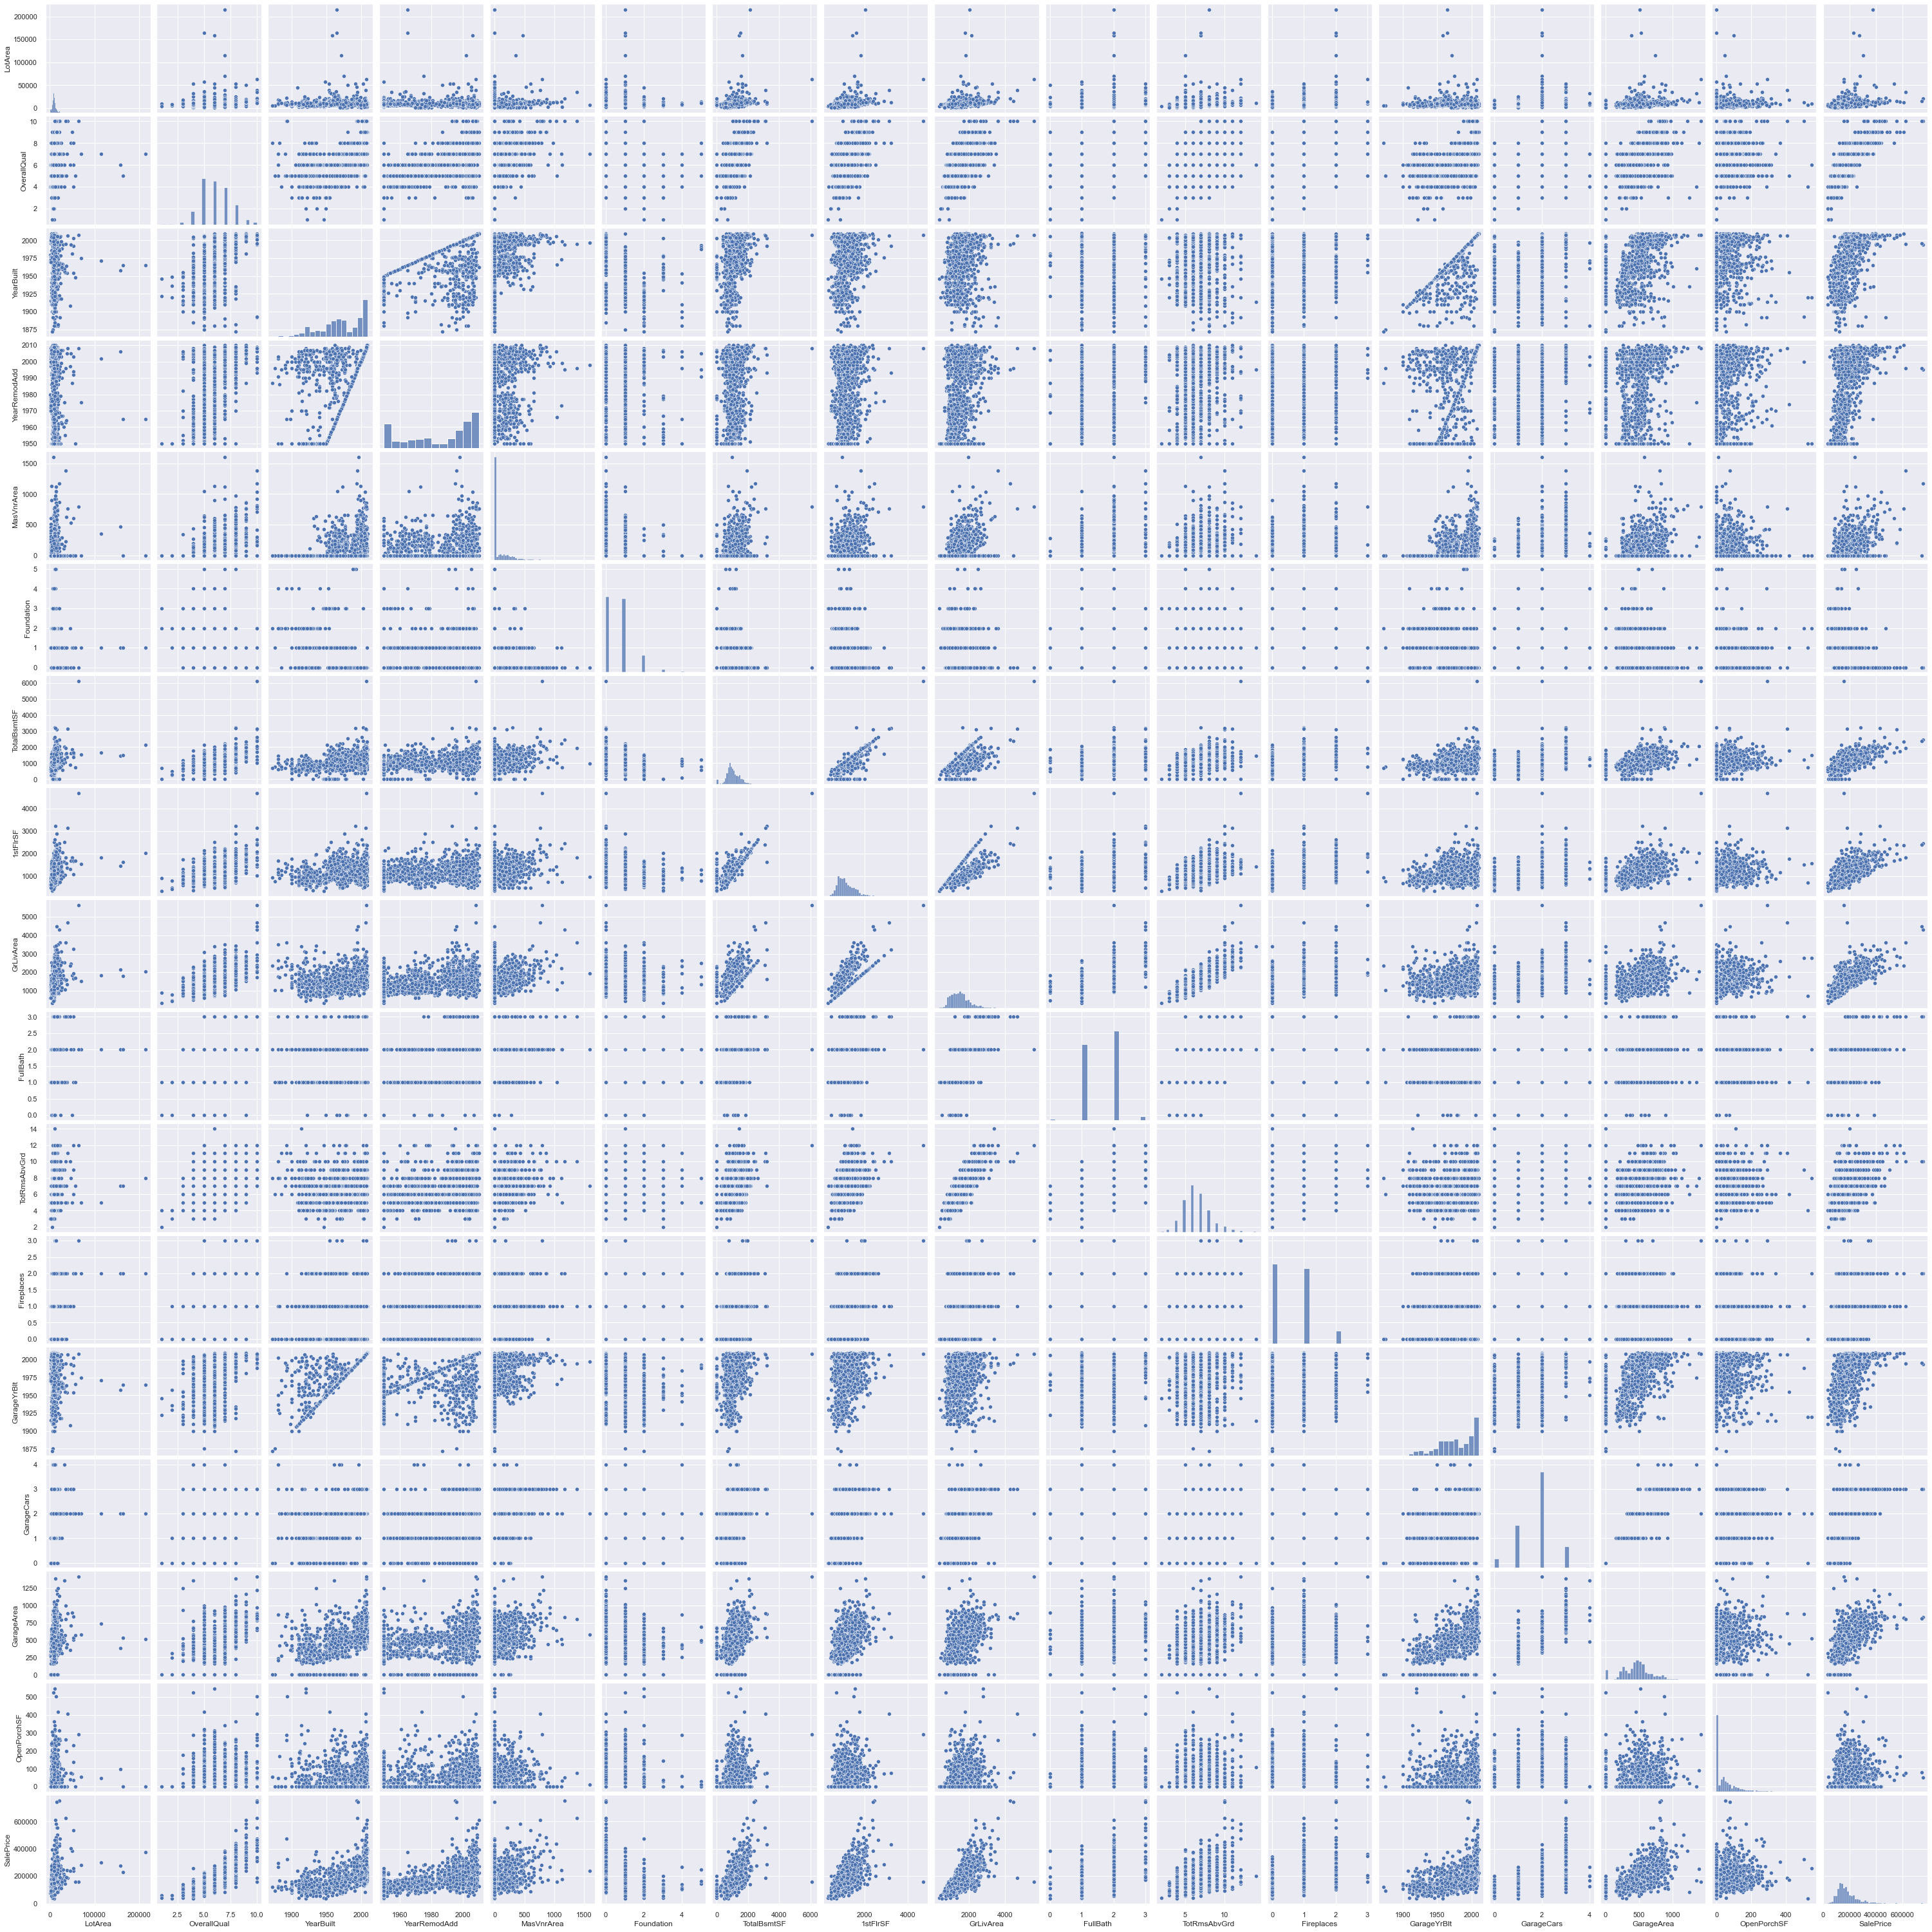

In [46]:
#scatterplot
sns.set()
sns.pairplot(df_train, size = 2.5)
plt.show()

In [50]:
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [51]:
X_train = df_train.drop('SalePrice', axis=1).values
target_label = df_train['SalePrice'].values
X_test = df_test.values

In [52]:
X_tr, X_vid, y_tr, y_vid = train_test_split(X_train, target_label, test_size=0.3, random_state=2018)

In [53]:
model = linear_model.LinearRegression()
model.fit(X_tr, y_tr)

LinearRegression()

In [55]:
prediction = model.predict(X_vid)

In [62]:
prediction = prediction.astype(int)

In [66]:
submission = pd.read_csv('./sample_submission.csv')

In [67]:
prediction = model.predict(X_test)

In [68]:
submission['SalePrice'] = prediction

In [69]:
submission.to_csv('./my_first_submission.csv', index=False)